In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

In [2]:
# Import csv and read in to dataframe.
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# Set labels
labels = df['MYOPIC']

In [4]:
# Remove the "MYOPIC" column from the dataset.
df = df.drop(columns=["MYOPIC"])
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# List data types
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [6]:
# Check for null value
for column in df.columns:
    print(f'Column {column} has {df[column].isnull().sum()} null values')

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [7]:
# Standardize your dataset so that columns with larger values do not influence those with smaller values.
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:1])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]]


### Part 2: Apply Dimensionality Reduction

In [8]:
# Perform dimensionality reduction with PCA. 
pca = PCA(n_components=0.90)

# Get the principal components for the myiopia data.
myopia_pca = pca.fit_transform(df_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [9]:
# Transform PCA data to a dataframe
df_myopia_pca = pd.DataFrame(
    data=myopia_pca)
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


#### How did the number of the features change?  
The number of features reduced from 14 to 10.

In [10]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results.
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopia_pca)
tsne_features.shape

C:\Users\mjrafol\Anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

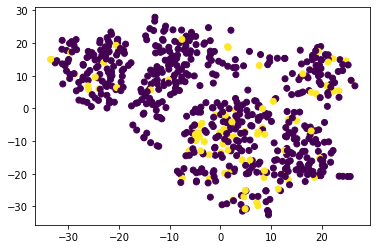

In [11]:
# Create a scatter plot of the t-SNE output.
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

#### Are there distinct clusters?
Yes.

### Part 3: Perform a Cluster Analysis with K-means

In [12]:
# Create an elbow plot to identify the best number of clusters.
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Create the elbow curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\mjrafol\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.244251
3,4,5661.869024
4,5,5382.018181


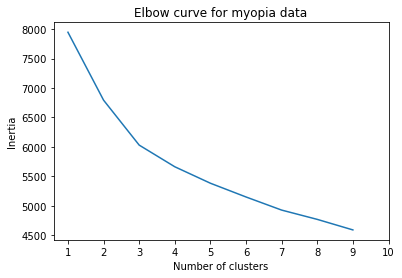

In [13]:
# Plot the elbow curve to find the best candidate for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

#### What is the value of K?
3, point of which the elbow of plot is.

In [14]:
# Run model using 3 as value of K.
model = KMeans(n_clusters=3, random_state=10)
model.fit(df_myopia_pca)

KMeans(n_clusters=3, random_state=10)

In [15]:
# Get predictions
predictions = model.predict(df_myopia_pca)

In [16]:
# Add the predicted class column to the dataframe
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


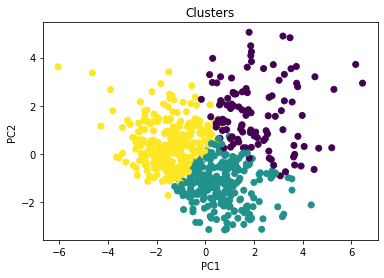

In [17]:
# Visualize the clusters
plt.scatter(x=df_myopia_pca[0], y=df_myopia_pca[1], c=df_myopia_pca['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters')
plt.show()

### Part 4: Make a Recommendation

Based on the machine learning results, there are **three distinct groups or clusters of patients** that would be better to analyze separately. <br> The elbow plot showed a **K value of 3**.